In [ ]:
# Reading the data
import pandas as pd

df = pd.read_csv("/content/Telco_Customer_Churn.csv")

In [ ]:
# showing the first 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# using info() to know the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# using describe() to have an overview of the numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# to make sure that there are no duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking the missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# checking if there are duplicates in "customerID" column
df["customerID"].duplicated().sum()

np.int64(0)

In [ ]:
# lets draw histograms with KDE for the numerical columns to know how they are distributed
# split categorical and numarical
# but before splitting them, I will drop the "customerID" column, because all the values are unique so it hasn't any value to us. Especially when building the model
df.drop(columns = ["customerID"], inplace = True)

In [ ]:
# converting the "TotalCharges" column to numerical
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# splitting the data into numerical and categorical
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

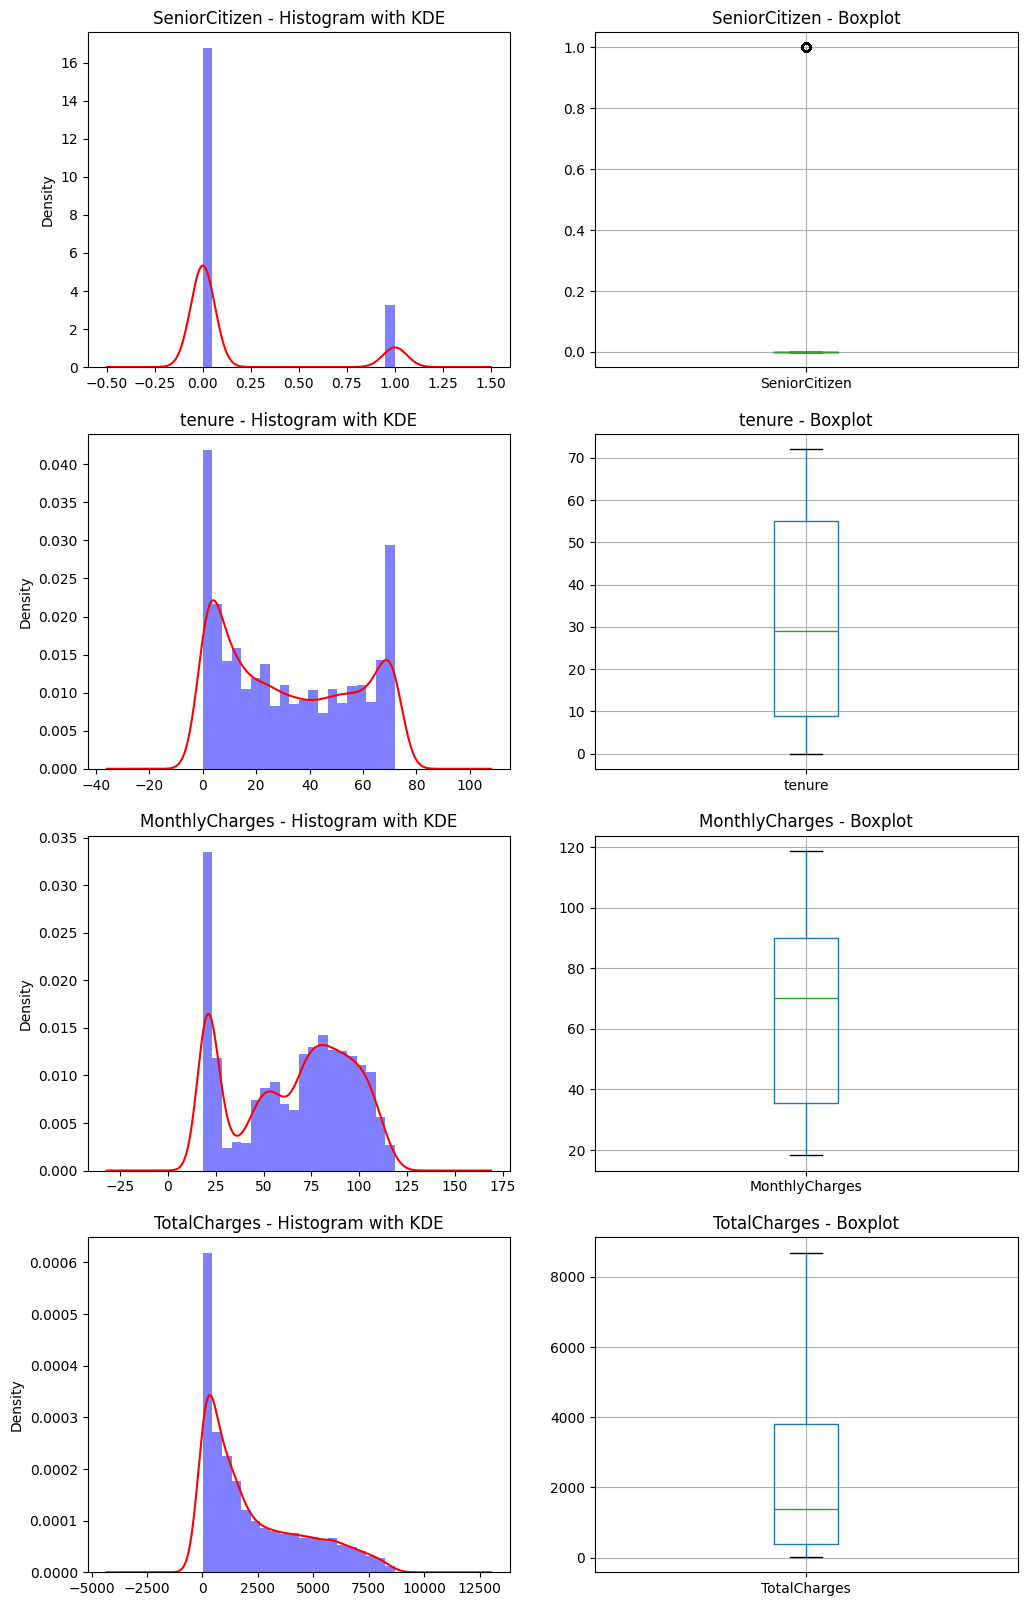

In [ ]:
# now, the data is ready to be used to draw the histograms
import numpy as np
import matplotlib.pyplot as plt

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # We can add Boxplot to be more clear
    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.show()

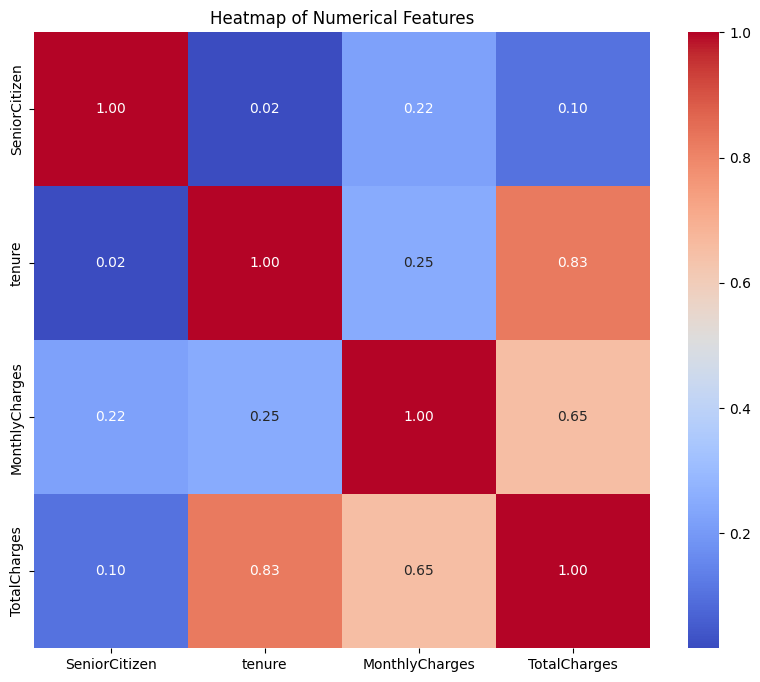

In [ ]:
# draw a heatmap to know if there is correltaion between the columns
import seaborn as sns
corr = df_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

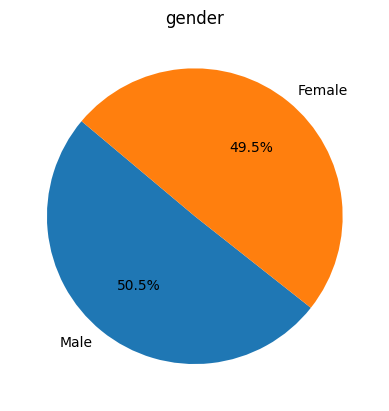

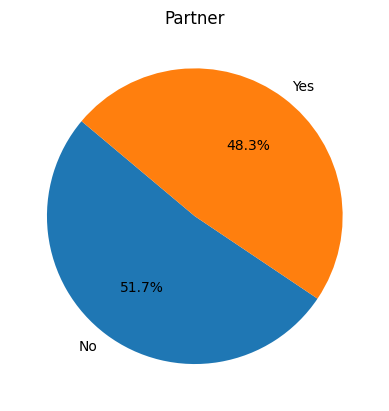

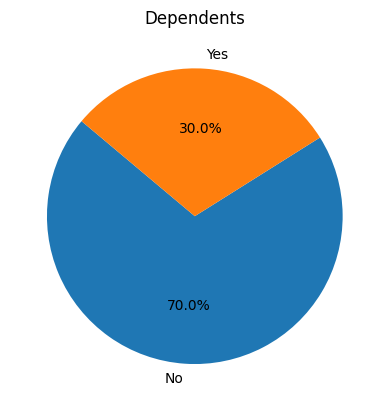

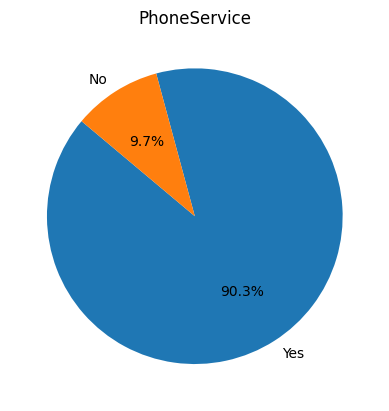

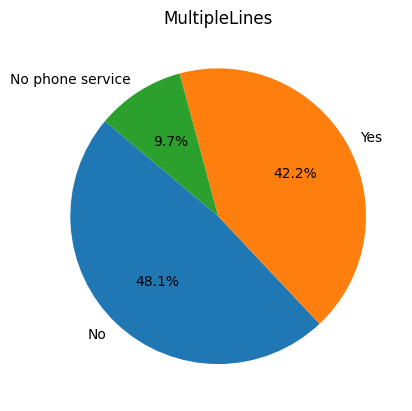

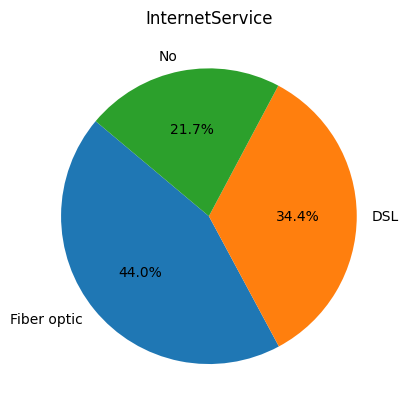

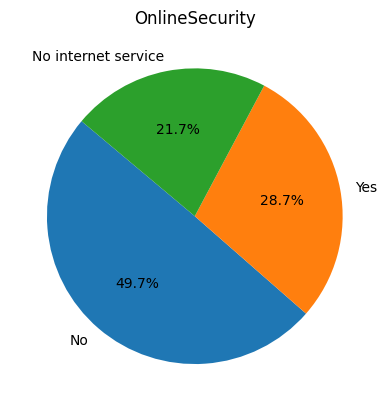

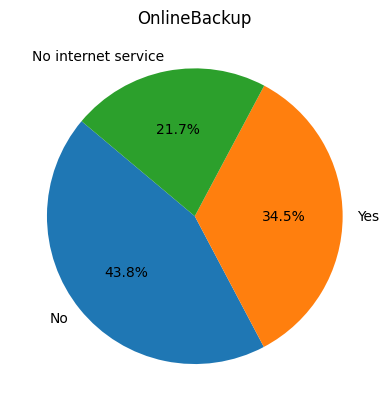

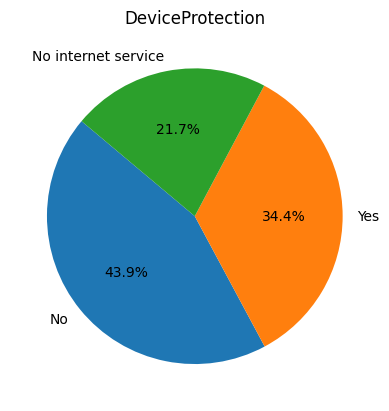

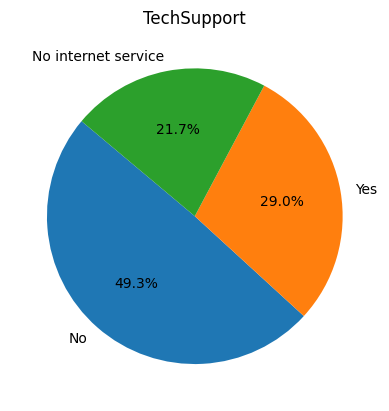

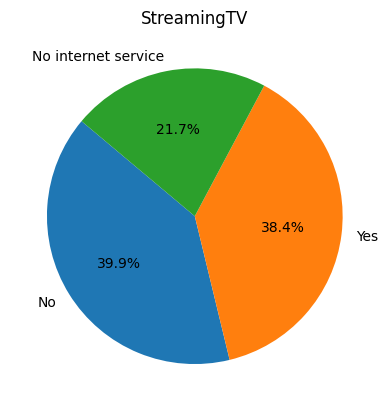

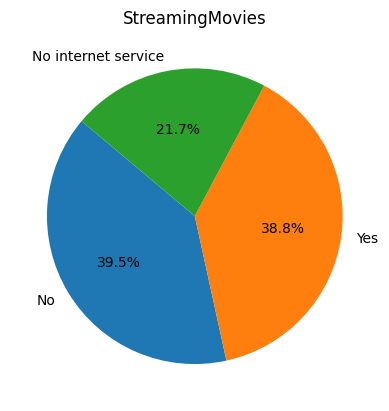

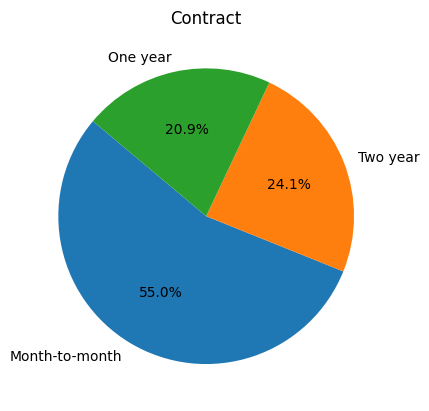

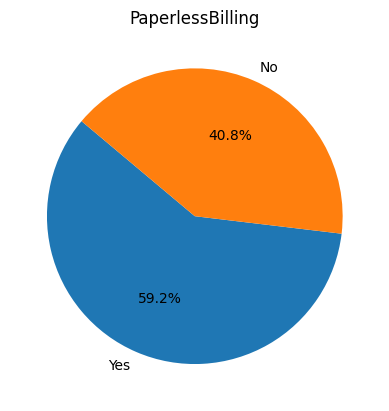

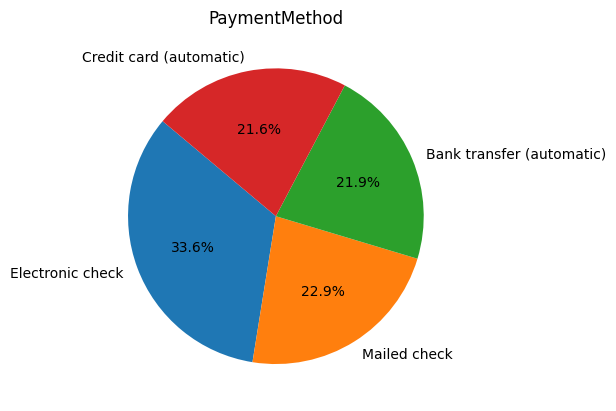

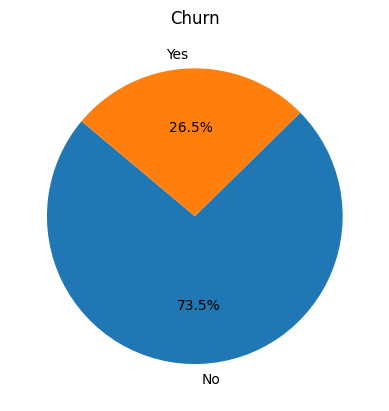

In [ ]:
for col in df_categorical_features.columns:
  counts = df_categorical_features[col].value_counts()
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  plt.title(f"{col}")
  plt.show()

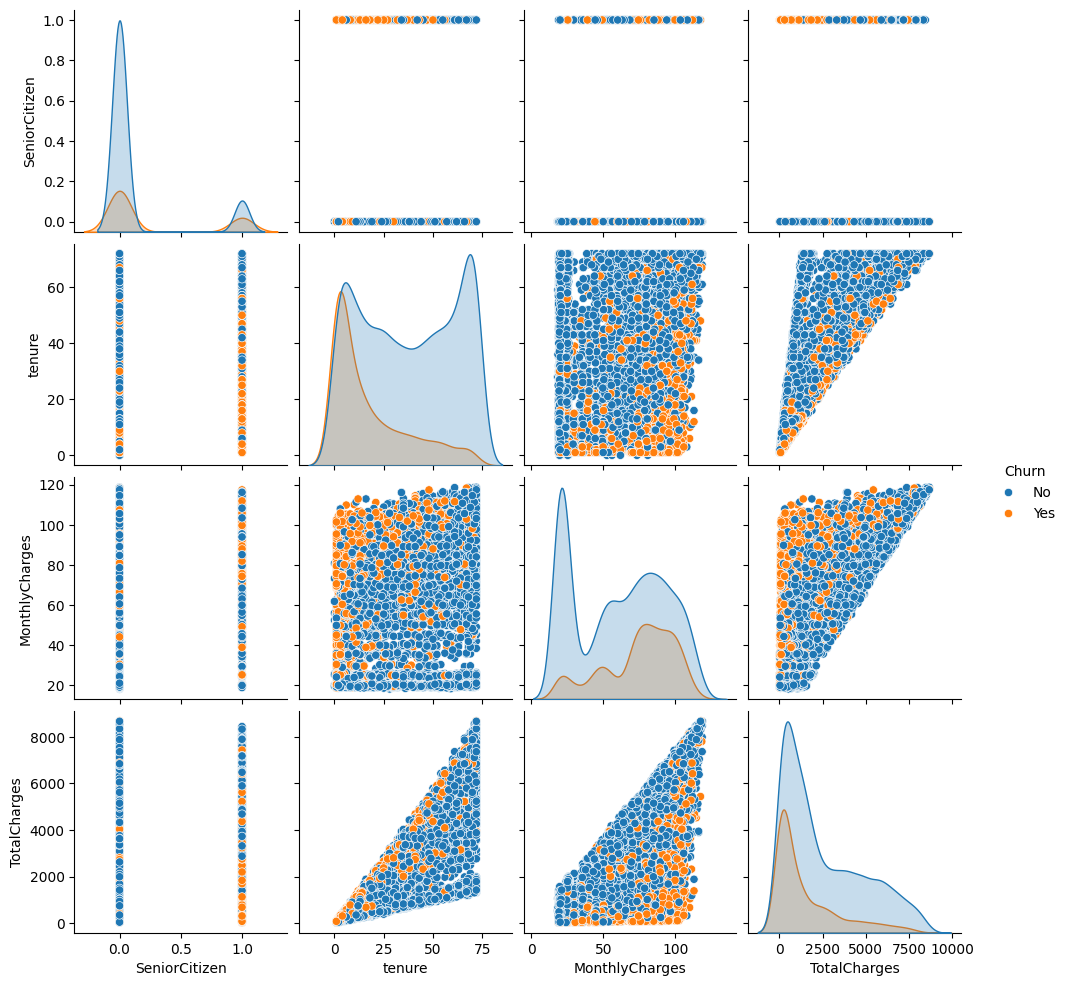

In [ ]:
df_numerical_features["Churn"] = df["Churn"]

sns.pairplot(data=df_numerical_features, hue="Churn")

# Data pre-processing

In [ ]:
'''
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['TotalCharges']] = imputer.fit_transform(df[['TotalCharges']])
'''

# filling the missing values in the "TotalCharges" column with the median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)

<ipython-input-75-ac9c9f9f4f8b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)


In [ ]:
# converting the binary columns to 0 and 1
cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    df[col] = np.where(df[col] == 'Yes', 1, 0)

In [ ]:
# encoding the categorical columns
df_encoded = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
# split the target column
X = df_encoded.drop(columns=['Churn'],axis=1)
y = df_encoded['Churn']

In [ ]:
# solving the imbalanced data using BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

# applying the BorderlineSMOTE
borderine_SMOTE=BorderlineSMOTE()

# fit and resample the data
X, y = borderine_SMOTE.fit_resample(X, y)


In [ ]:
'''
# Use ADASYN to solve the Imbalance issue
from imblearn.over_sampling import ADASYN

# apply ADASYN
adasyn = ADASYN(random_state=42)

# fit and transform the data
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
'''

In [ ]:
# split the data into tain/test
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=42, stratify=y)

In [83]:
# Scale the data using StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# fit and transform the data
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Build the models

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [ ]:
param_grids = {
    "K Neighbors Classifier": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Ridge Classifier": {
        'alpha': [0.1, 1, 10, 100]
    },
    "Extra Trees Classifier": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    
    "Naive Bayes": {},  # GaussianNB has no hyperparameters to tune
    
    "XGBoost Classifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

In [87]:
models = {
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost Classifier": XGBClassifier(eval_metric='logloss')
}

In [88]:
def evaluate_models_with_gridsearch(X_train, y_train, X_test, y_test):
    results = []
    best_model = None
    best_accuracy = 0
    best_model_name = ""

    for name, model in models.items():
        print(f"Tuning {name}...")

        if param_grids[name]:
            grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            tuned_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            tuned_model = model.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = tuned_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Best Params": best_params,
            "Accuracy": accuracy,
            "Precision": precision_score(y_test, y_pred, average='weighted'),
            "Recall": recall_score(y_test, y_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_pred, average='weighted')
        })

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = tuned_model
            best_model_name = name

    if best_model:
        joblib.dump(best_model, f"Best_Model_{best_model_name.replace(' ', '_')}.pkl")
        print(f"Best model saved: {best_model_name} with accuracy {best_accuracy}")

    return pd.DataFrame(results)

In [ ]:
# Start evaluating the models
comparison_df = evaluate_models_with_gridsearch(X_train, y_train, X_test, y_test)
print(comparison_df)

Tuning K Neighbors Classifier...
Tuning Logistic Regression...
Tuning Ridge Classifier...
Tuning Extra Trees Classifier...
Tuning Naive Bayes...
Tuning XGBoost Classifier...
Best model saved: XGBoost Classifier with accuracy 0.8507246376811595
                    Model                                        Best Params  \
0  K Neighbors Classifier  {'metric': 'manhattan', 'n_neighbors': 7, 'wei...   
1     Logistic Regression                        {'C': 1, 'solver': 'lbfgs'}   
2        Ridge Classifier                                     {'alpha': 100}   
3  Extra Trees Classifier  {'max_depth': 20, 'min_samples_split': 10, 'n_...   
4             Naive Bayes                                                N/A   
5      XGBoost Classifier  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...   

   Accuracy  Precision    Recall  F1 Score  
0  0.826570   0.829586  0.826570  0.826172  
1  0.842995   0.842998  0.842995  0.842995  
2  0.834300   0.834307  0.834300  0.834299  
3  0.850242   0

In [90]:
# save scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [91]:
# save poly
import joblib
joblib.dump(poly, 'poly.pkl')

['poly.pkl']